# CM50268 :: Final project (group work)

**Total Marks 25 (25% of overall unit grade).** 

*Submission deadline: 8pm, May 10, 2022. Please submit this file along with your individual report in Moodle*

## Submission & Marking

This group exercise is assessed, and the marks will contribute to your final grade. For this exercise there are a number of places where you are expected to enter your own code. Please see the BML Final Project Specification document for details. 

Every place you have to add code is described in the text and specifically indicated by the comment:

`#### **** YOUR CODE HERE **** ####`


**Please submit your completed workbook using Moodle before 8pm on May 10, 2022 along with your individual report**. The workbook you submit must be this `.ipynb` file, which is saved into the directory you're running Jupyter; alternatively you can download it from the menu above using `File -> Download As -> Notebook (.ipynb)`. Remember to save your work regularly (Save and Checkpoint in the File menu, the icon of a floppy disk, or Ctrl-S); the version you submit should have all code blocks showing the results (if any) of execution below them.

**You should take care to avoid any suggestion of plagiarism in your submission.** There is helpful information on how to avoid plagiarism on the University website: http://www.bath.ac.uk/library/help/infoguides/plagiarism.html

# Project setup

This coursework involves the evaluation of Bayesian modelling methods on a real multivariate regression task. Please check the pdf file for the details of the project.

- <font color=Red> Please try to use fixed random seeds to make your results reproducible </font>

- <font color=Red> Please do NOT change the name of the fixed variables, as Task 2 - Task 5 of this coding exercises are auto-marked </font>

The marks for Task 1 and Task 6 will be awarded based only on the content of the report.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

import hmc_Lab as hmc
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from math import sqrt

# Task 1 : Exploratory analysis (Section 4.1 in the specification doc)

Undertake an initial exploratory analysis of the training data and summarise. Code in Task 1 will NOT by auto-marked. Results of Task 1 will be assessed along with your individual report, i.e., 4 marks in total. 

 - <font color=Red> Please perserve the variables `X_train` and  `y_train` representing the normalised data in numpy array, as required for the following exercises  </font>

 - `X_train` is an np.array with shape (384, 9). The 1st column is a constant (bias) $x_0$ and the 2nd to the 9th columns are data variables $x_1,x_2,\dots,x_8$

 - `y_train` is also an np.array with shape (384,), representing the target variable $y$ 

Undertake an initial exploratory analysis of the given data variables and summarise appropriately.
This need not be particularly extensive, but it should demonstrate that you have undertaken some
degree of \due diligence" with respect to the data set. In particular, you should focus on identifying
which of the input variables (if any) might be expected to be useful for predicting heating load, and
which might be irrelevant. You may also wish to comment on the apparent linearity, or otherwise,
of the problem.

As the final part of the exploratory analysis, establish a predictive \baseline" by fitting a linear
model to the training set by least-squares, and assessing its prediction accuracy on both train and
test sets.

This section of your report should include:

Initial observations as to the diculty of the task, its linearity etc.

Your comment on the likely relevance of the variables for predicting \Heating Load"

Appropriate graphs/charts as evidence to support the above

Detail of the accuracy of the least-squares linear model, on both train and test sets, in terms
of mean absolute error (MAE).

In [2]:
#### **** YOUR CODE HERE **** ####  
df_train = pd.read_csv('ee-train.csv')
df_test = pd.read_csv('ee-test.csv')

#### **** You can add extra cells to illustrate your results **** ####  

In [3]:
df_train.head()

,const,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,1,0.62,808.5,367.5,220.5,3.5,3,0.10,5,12.74
1,1,0.90,563.5,318.5,122.5,7.0,3,0.10,2,29.68
2,1,0.90,563.5,318.5,122.5,7.0,3,0.40,2,36.57
3,1,0.79,637.0,343.0,147.0,7.0,2,0.25,2,38.57
4,1,0.90,563.5,318.5,122.5,7.0,4,0.40,5,34.72


In [4]:
df_test.head()

,const,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
1,1,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
2,1,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71
3,1,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68
4,1,0.86,588.0,294.0,147.00,7.0,4,0.0,0,19.34


In [5]:
df_train_corr = df_train.corr()

Text(69.0, 0.5, 'Weather components')

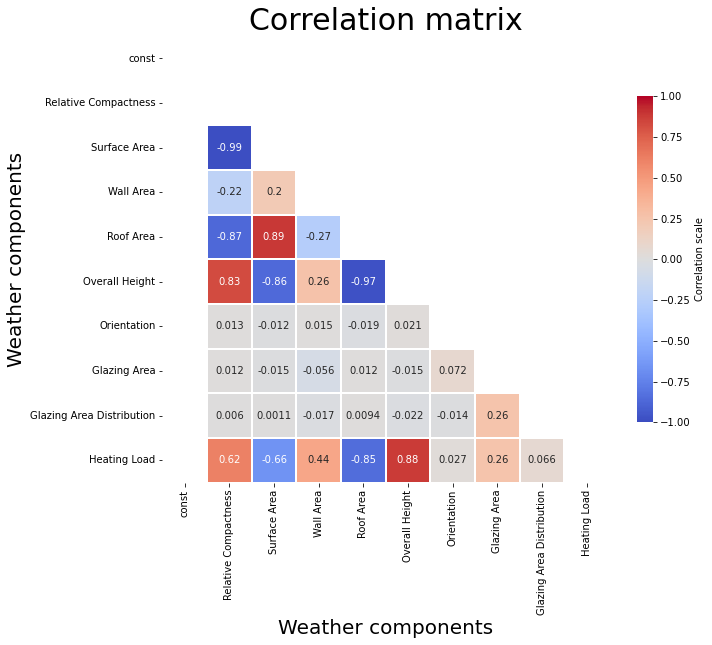

In [6]:
# sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_train_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 15))

# Draw the heatmap with the mask and correct aspect ratio
corr_hm = sns.heatmap(df_train_corr, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, annot=True, linewidths=.1,  cbar_kws={'label': 'Correlation scale', 'shrink': 0.4})

corr_hm.set_title('Correlation matrix', size=30)
corr_hm.set_xlabel('Weather components', fontsize = 20)
corr_hm.set_ylabel('Weather components', fontsize = 20)

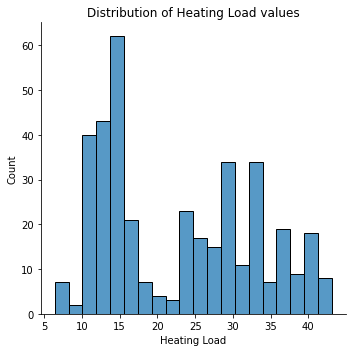

In [7]:
sns.displot(df_train['Heating Load'], kde=False, bins=20).set(xlabel='Heating Load', ylabel='Count')
plt.title('Distribution of Heating Load values')
plt.tight_layout()
plt.show()

In [8]:
ss = StandardScaler()

train_ss = pd.DataFrame(ss.fit_transform(df_train), columns=df_train.columns)
test_ss = pd.DataFrame(ss.transform(df_test), columns=df_test.columns)

train_ss2 = pd.DataFrame(df_train, columns=df_train.columns)
test_ss2 = pd.DataFrame(df_test, columns=df_train.columns)

train_ss['const'] = 1
test_ss['const'] = 1

X_train = train_ss.drop('Heating Load', axis=1).values

y_train = train_ss2['Heating Load'].values
y_train_ss = train_ss['Heating Load'].values

Y_train = y_train
X_test = test_ss.drop('Heating Load', axis=1).values

y_test = test_ss2['Heating Load'].values
y_test_ss = test_ss['Heating Load'].values

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     544.8
Date:                Fri, 13 May 2022   Prob (F-statistic):          1.72e-192
Time:                        14:56:01   Log-Likelihood:                -968.22
No. Observations:                 384   AIC:                             1952.
Df Residuals:                     376   BIC:                             1984.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.9207      0.155    147.581      0.000      22.615      23.226
x1            -7.2346      1.654     -4.373      0.000     -10.488      -3.982
x2            -3.9422      1.206     -3.269      0.001      -6.314      -1.571
x3             0.7560      0.312      2.420      0.016       0.142       1.370
x4            -4.2319      1.091     -3.880      0.000      -6.376      -2.087
x5             7.2040      0.858      8.401      0.000       5.518       8.890
x6            -0.1252      0.156     -0.803      0.423      -0.432       0.182
x7             2.7702      0.162     17.129      0.000       2.452       3.088
x8             0.2041      0.161      1.267      0.206      -0.113       0.521
==============================================================================
Omnibus:                        7.903   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.019   Jarque-Bera (JB):               11.852
Skew:                           0.109   Prob(JB):                      0.00267
Kurtosis:                       3.832   Cond. No.                     1.93e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.81e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

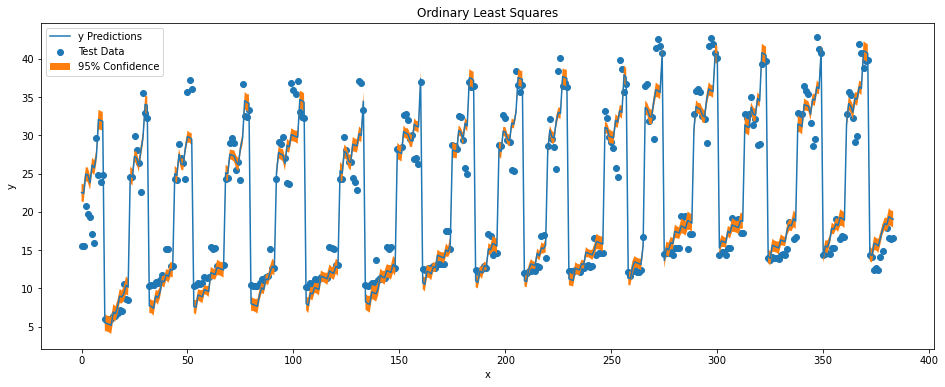

In [9]:
import statsmodels.api as sm
est = sm.OLS(y_train, X_train).fit()
y_pred_train = est.predict(X_train)
y_pred_test = est.predict(X_test)
cov = est.cov_params()
std_pred = np.sqrt(np.diag(X_test @ cov @ X_test.T))

"""Plots the predictions and test, with the confidence interval."""
plt.subplots(figsize=(16,6))

plt.scatter(x=range(len(y_test)),
            y=y_test,
            label='Test Data')

plt.plot(y_pred_test,
            label='y Predictions')

plt.fill_between(x=range(len(y_pred_test)), 
                    y1=y_pred_test - 1.975 * std_pred, 
                    y2=y_pred_test + 1.975 * std_pred, 
                    label='95% Confidence')

plt.title('Ordinary Least Squares')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

est.summary()

In [10]:
# Check whether fixed variables are correctly defined ..
X_train = np.array(X_train)
y_train = np.array(y_train)

try:
    if not isinstance(X_train,np.ndarray):
        print('X_train should be an array')        
    if X_train.shape != (384,9):
        print('X_train is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)
    
try:
    if not isinstance(y_train,np.ndarray):
        print('y_train should be an array')        
    if y_train.shape != (384,):
        print('y_train is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)

#  Task 2 : Type-2 maximum likelihood (Section 4.2 (a) in the specification doc)

###  **(6 marks)**

Precisions are defined as: $\alpha = 1 / \sigma_w^2$ and $ \beta = 1 / \sigma_{\epsilon}^2 $

Assume priors of $\alpha$ and $\beta$ follow flat Uniform distributions, please derive a likelihood function $(y|\alpha, \beta)$ (`compute_log_marginal`) to compute the *log-ikelihood* for the Bayesian linear regression problem using $X$ and hyperparameters $\alpha$ and $\beta$. 

In Lecture 4, slide 11 and 12 we have illustrated the equations of finding the most probable hyperparameters to maximise the likelihood with respect to the hyperparameters (slide 12).


`X`: this is an np.array equivalent to matrix $X$ in the specification doc, e.g., `X_train`, `X_test`.

`y`: this is an np.array equivalent totarget $y$ in the specification doc, e.g., `y_train`, `y_test`.


In [11]:
# Compute log-likelihood

def compute_log_marginal(X, y, alph, beta):
    
    cov = 1/beta * np.identity(X.shape[0]) + np.matmul(1/alph * X, X.T)
    lgp = stats.multivariate_normal.logpdf(y, cov=cov, allow_singular=True)
    
    return lgp

Compute log-evidence (marginal likelihood) `log_prob_y` and plot the 'contourf' of the log-posterior distribution.

- The x-axis should be the value of $log \alpha$ and y-axis the $log\beta$, `log_prob_y` represents the log-evidence. For each axis, it is recommended to use 
`np.linspace(-5,0,100)`

- It is strongly recommended that you use only natural logarithms for hyper-parameter scales. That is, you would use `numpy.exp()` and `numpy.log()` functions to convert (or to convert back) the logarithm terms.

In [12]:
#### **** YOUR CODE HERE **** ####   
log_alph = np.linspace(-5, 0, 100)
log_beta = np.linspace(-5, 0, 100)
log_prob_y = np.zeros([100,100])

for i in range(100):
    for j in range(100):
        a = np.exp(log_alph[i])
        r = np.exp(log_beta[j])
        log_prob_y[i,j] = compute_log_marginal(X_train, y_train, a, r)
        
# Check whether your variables are correctly defined ..
try:
    if not isinstance(log_prob_y,np.ndarray):
        print('log_prob_y should be an array')        
    if log_prob_y.shape != (100,100):
        print('log_prob_y is arranged in a wrong shape')
except Exception as err:
    print('Error output:', err)

Print out the most proboble values of the parameters $\alpha$ and $\beta$ and the corresponding log-likelihood value.

In [13]:
#### **** YOUR CODE HERE **** ####
x, y = np.unravel_index(np.argmax(log_prob_y), log_prob_y.shape)
max_alph = np.exp(log_alph[x])
max_beta = np.exp(log_beta[y])
# max_alph = log_alph[x]
# max_beta = log_beta[y]
max_log = log_prob_y.max()

print('Most Probable Alpha =', max_alph)
print('Log alpha =', np.log(max_alph))
print('Most Probable Log Beta =', max_beta)
print('Log Beta =', np.log(max_beta))
print(f'Max Log Marginal Likelihood = {max_log}')

Most Probable Alpha = 0.01174362845702136
Log alpha = -4.444444444444445
Most Probable Log Beta = 0.10836802322189586
Log Beta = -2.2222222222222223
Max Log Marginal Likelihood = -1001.4576252255187


Visualisation using `plt.contourf`for the posterior distribution and indicate the most probable value (with a highlighted marker) in the graph.

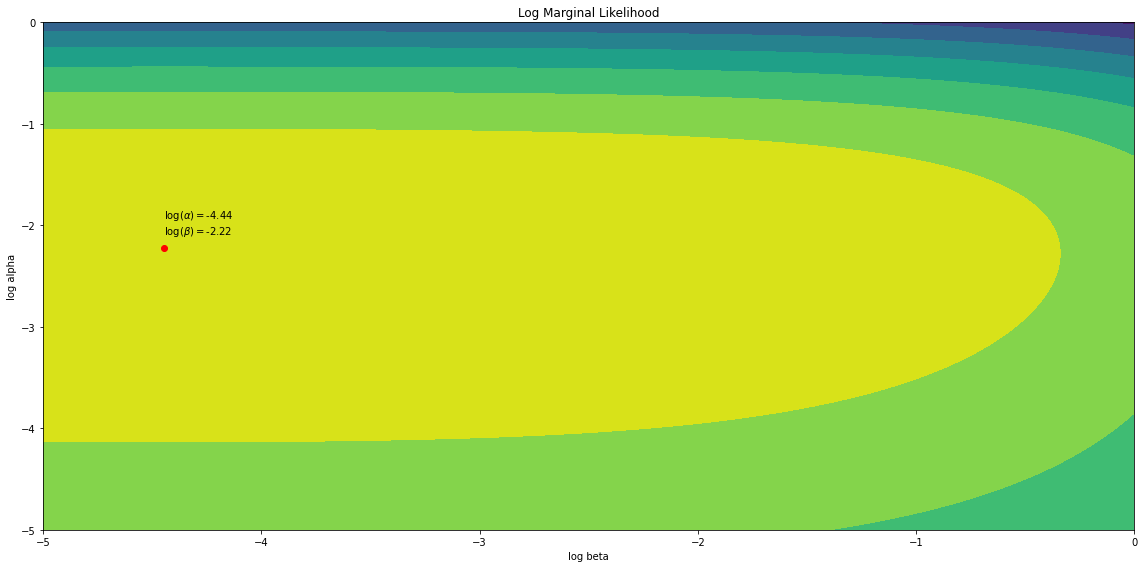

In [14]:
#### **** YOUR CODE HERE **** ####

plt.figure(figsize=(16, 8))
plt.contourf(log_alph, log_beta, log_prob_y.T)
#plt.plot(np.log10(max_alph), np.log10(max_beta), 'ro')
plt.plot(np.log(max_alph), np.log(max_beta), 'ro')
plt.annotate(r'log($\alpha)=$' + f'{np.log(max_alph):.2f}\n'+ r'log($\beta)=$' + 
             f'{np.log(max_beta):.2f}\n', (np.log(max_alph), np.log(max_beta)))
plt.xlabel('log beta')
plt.ylabel('log alpha')
plt.title('Log Marginal Likelihood')
plt.tight_layout()
plt.savefig('Log Marginal Likelihood.png')
plt.show()

Write a function `compute_posterior(X, y, alph, beta)`  to compute the posterior mean $\mathbf{\mu}$ (`Mu`) and covariance $\mathbf{\Sigma}$ (`SIGMA`) for the Bayesian linear regression model, and return `Mu` and `SIGMA` for the posterior in the np.array format. 

In [15]:
def compute_posterior(X, y, alph, beta):
    #
    Mu = np.linalg.inv(X.T @ X + beta*alph*np.identity(X.shape[1])) @ X.T @ y
    SIGMA = beta * np.linalg.inv(X.T @ X + beta*alph*np.identity(X.shape[1]))
    #
    return Mu, SIGMA

Calculate the predicted weights and print out the corresponding RMSE for training and test sets.

In [16]:
#### **** YOUR CODE HERE **** ####
from sklearn.metrics import mean_absolute_error, mean_squared_error

def predict(x_train, y_train, alph, beta, x_test):
    """Predict from the posterior."""
    w, mu = compute_posterior(x_train, y_train, alph, beta)
    y_pred = np.matmul(x_test, w)
    return y_pred, mu

y_pred_train, _ = predict(X_train, y_train, max_alph, max_beta, X_train)
y_pred_test, mu = predict(X_train, y_train, max_alph, max_beta, X_test)

alph = max_alph
beta = max_beta
Mu, SIGMA = compute_posterior(X_train, y_train, np.exp(alph), np.exp(beta))
predicted_weights = X_train @ Mu #np.dot(X_train, Mu)

err_train = mean_squared_error(y_train, y_pred_train)
err_test = mean_squared_error(y_test, y_pred_test)

print('Predicted Weights Shape is:', predicted_weights.shape)
print(f'Maximum Predicted Weights for Train is {y_pred_train.max()} and Test is {y_pred_test.max()}')
print(f'Minimum Predicted Weights for Train is {y_pred_train.min()} and Test is {y_pred_test.min()}')
RMSE_train = sqrt(mean_squared_error(y_train, predicted_weights, squared=False))
print('RMSE for Training Sets is:', RMSE_train)
RMSE_test = sqrt(mean_squared_error(y_test, predicted_weights, squared=False))
print('RMSE for Test Sets is:', RMSE_test)

Predicted Weights Shape is: (384,)
Maximum Predicted Weights for Train is 40.797007540053045 and Test is 41.02538365616972
Minimum Predicted Weights for Train is 6.575811395683586 and Test is 5.193800756438562
RMSE for Training Sets is: 1.7374903448795767
RMSE for Test Sets is: 3.766978129764299


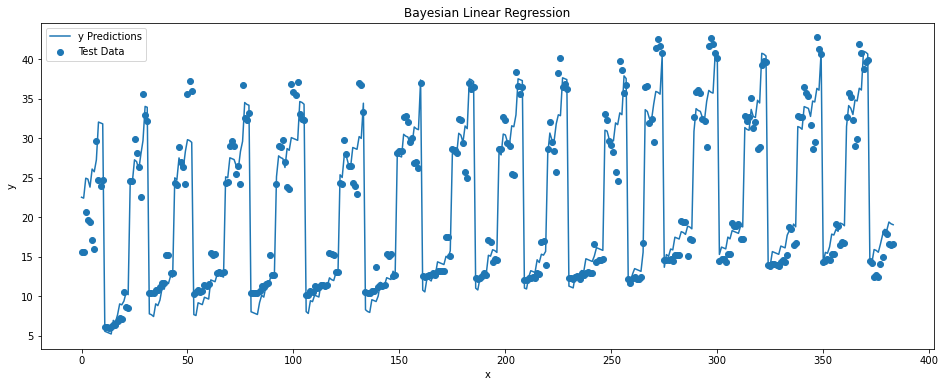

In [17]:
def plot_pred(y_test, y_pred, title):
    """Plots the predictions and test, with the confidence interval."""
    plt.subplots(figsize=(16,6))
    
    plt.scatter(x=range(len(y_test)),
                y=y_test,
                label='Test Data')
    
    plt.plot(y_pred,
             label='y Predictions')

    
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()


plot_pred(y_test, y_pred_test, 'Bayesian Linear Regression')

# Task 3: Variational Inference (Section 4.2 (b) in the specification doc)

###  **(4 marks)**

Write a Variational Inference function `VI(X_train, Y_train)` and return parameter estimates. 

The returned terms should include:

`an`, `bn`, `cn`, `dn`: float

`mn_n`: np.array, shape = (9,),

`sig_n`: np.array, shape = (9,9),

where

`an` and `bn` are the hyper-parameters for $w\propto  N(w|0,\alpha)$,  $\alpha\propto Gamma(\alpha|a,b) $. 

`cn` and `dn` are the hyper-parameters for gaussian noise $N(0,\beta)$,  $\beta\propto Gamma(\beta|c,d) $.

`mn_n` and `sig_n` are the mean $\mathbf{\mu}$ and covariance $\mathbf{\Sigma}$ of the posterior distribution w.r.t. $w$ (in this task) for the Bayesian linear regression model.

The corresponding derivations should be completed in your report.



In [18]:
def error_rms(t, y):
    """Compute RMS error for a prediction vector"""
    err = np.sqrt(np.mean((y - t) ** 2))
    return err

def VI(X_train, y_train):
    """Variational Inference"""

    # Initialise...
    a0,b0,c0,d0 = 1e-4,1e-4,1e-4,1e-4
    alpha0 = a0/b0
    beta0 = c0/d0
    mu_n, sig_n = compute_posterior(X_train, y_train, alpha0, beta0)
    an = a0 + 9/2
    cn = c0 + 384/2
    bn,dn = b0,d0
    
    for i in range(len(X_train)):
        bn = b0 + 1/2*(mu_n.T @ mu_n + np.trace(sig_n))
        dn = d0 + 1/2*((y_train - X_train @ mu_n).T @ (y_train - X_train @ mu_n))
        alphaN, betaN = an/bn, cn/dn
        mu_n, sig_n = compute_posterior(X_train, y_train, alphaN, betaN)
    
    return an, bn, cn, dn, mu_n, sig_n

an, bn, cn, dn, mu_n, sig_n = VI(X_train, y_train)

Print out the expectation of $\alpha$ and $\beta$ as `exp_alpha`,`exp_beta`. 


In [19]:
try:
    an,bn,cn,dn, mu_n, sig_n = VI(X_train, Y_train)
except Exception as err:
    print('Error output:', err)
    
#### Print out the expectation of alpha and beta
#### **** YOUR CODE HERE **** ####

exp_alpha = (an / bn)
exp_beta = (cn / dn)

print(f"Expected alpha: {exp_alpha}")
print(f"Expected beta: {exp_beta}")

# exp_alpha = alphas[-1]
# exp_beta = betas[-1]
# first_alpha = alphas[0]
# first_beta = betas[0]
# mu_n = mu_n[-1]
# sig_n = sig_n[-1]

# print(f"Expected alpha: {exp_alpha}")
# print(f"Expected beta: {exp_beta}")
# print(f"Expected log(alpha): {np.log(exp_alpha)}")
# print(f"Expected log(beta): {np.log(exp_beta)}")
# print(f"Best log probability: {compute_log_marginal(X_train, y_train, exp_alpha, exp_beta)}")

Expected alpha: 0.011916753508455558
Expected beta: 0.11026038962261914


In [20]:
# Check whether your variables are correctly defined  ..
try:
    if not isinstance(mu_n,np.ndarray):
        print('mu_n should be an array')        
    if mu_n.shape != (9,):
        print('mu_n is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)
    
try:
    if not isinstance(sig_n,np.ndarray):
        print('sig_n should be an array')        
    if sig_n.shape != (9,9):
        print('sig_n is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)
    
try:
    exp_alpha
    exp_beta
except Exception as err:
    print('Error output:', err)

Calculate the RMSE for training and test sets.

In [21]:
#### **** YOUR CODE HERE **** ####


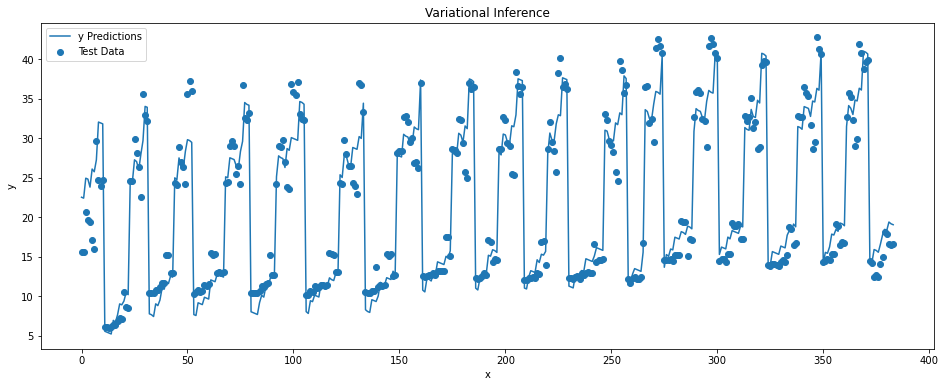

In [22]:
y_pred = X_test @ mu_n

plot_pred(y_test, y_pred, 'Variational Inference')

# Task 4: Verify HMC on a standard 2D Gaussian example (Section 4.3 in the specification doc)

###  **(4 marks)**

## The "Distribution"

Complete the following functions:

- `energy_func(x)`: the energy function, return negative log pdf value in float format
- `energy_grad(x)`: the gradient function returns a numpy array containing the partial derivatives of the energy function with respect to the parameters/hyper-parameters.
- `covar`: Covariance matrix for 2-dimensional gaussian. It is an numpy array with shape (2,2), e.g,  np.array([[1.0875,1],[1,1.0875]]) 

- `R`: the number of samples desired
- `L`: number of simulation steps; for this simple case, 20 is easily enough
- `eps`: simulation step length; set by trial-and-error to give approx. 90% acceptance
- `burn`: simply set to `R/10`
- `checkgrad`: set to true to test the consistency of `energy_func` and `energy_grad`



In [23]:
def energy_func(x, covar):
    #### **** YOUR CODE HERE **** ####
    neglpg = np.negative(stats.multivariate_normal.logpdf(x, cov=covar))
    return neglpg

def energy_grad(x, covar):
    #### **** YOUR CODE HERE **** ####
    g = np.linalg.inv(covar) @ x
    return g

## Visualising the Distribution
Before we run the sampler, let's visualise the distribution over an appropriate
grid of values. Please specify `covar` to plot figures, an naive example of `covar` has been shown below

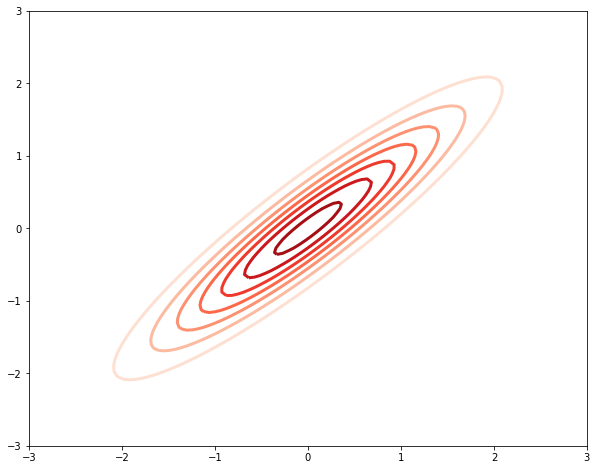

In [24]:
#### **** YOUR CODE BELOW **** ####

covar = np.array([[1.0875, 1],[1, 1.0875]])

#### **** YOUR CODE ABOVE **** ####

f = 5  # The "frequency" argument for the energy, used here to demonstrate how to use "args"
# Other plotting parameters
fsz = (10,8)
gsz = 100
lim = 3

# Setup the mesh grid

gx = np.linspace(-lim, lim, gsz)
GX, GY = np.meshgrid(gx, gx)
Gsz = GX.size
G = np.hstack((GX.reshape((Gsz, 1)), GY.reshape((Gsz, 1))))

# Plot the figure
plt.figure(figsize=fsz)
P = np.asarray([np.exp(-energy_func(g, covar)) for g in G])
plt.contour(GX, GY, P.reshape((gsz, gsz)), cmap='Reds', linewidths=3, zorder=1);

In [25]:
try:
    if not isinstance(covar ,np.ndarray):
        print('covar  should be an array')        
    if covar .shape != (2,2):
        print('covar  is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)

In [26]:
# Initialise the state for the first time step
x0 = np.random.normal(size=2)

# Call the function from the pre-defined hmc module
hmc.gradient_check(x0, energy_func, energy_grad, covar)

Calc.         Numeric       Delta         Acc.
   -0.627158     -0.627158   2.982503e-12  12
   -0.216962     -0.216962  -7.813039e-11  10


## Hyper-parameters

Please tune optimal hyper-parameters incluidng `R`, `L`, and `eps` in the cell below. 

Calc.         Numeric       Delta         Acc.
   -0.627158     -0.627158   2.982503e-12  12
   -0.216962     -0.216962  -7.813039e-11  10
|----------|  0% accepted [ 2 secs to go ]
|#---------| 92% accepted [ 2 secs to go ]
|##--------| 92% accepted [ 1 secs to go ]
|###-------| 91% accepted [ 1 secs to go ]
|####------| 91% accepted [ 1 secs to go ]
|#####-----| 91% accepted [ 1 secs to go ]
|######----| 90% accepted [ 1 secs to go ]
|#######---| 90% accepted [ 1 secs to go ]
|########--| 90% accepted [ 0 secs to go ]
|#########-| 90% accepted [ 0 secs to go ]
|##########| 90% accepted [ 0 secs to go ]
HMC: R=5000 / L=20 / eps=0.36 / Accept=90.4%


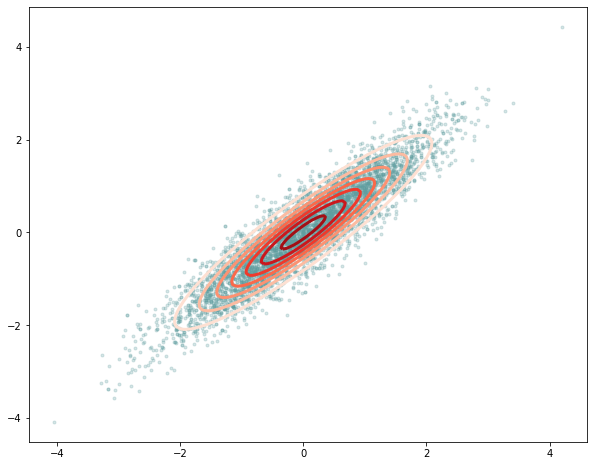

In [27]:
np.random.seed(seed=1)  # Fix the random seed for better reproducibility

#### **** YOUR CODE BELOW **** ####

R= 5000
L = 20
eps = 0.36
burn = int(R/10) 

#### **** YOUR CODE ABOVE **** ####

# HMC sampling
S, *_ = hmc.sample(x0, energy_func, energy_grad, R, L, eps, burn=burn, checkgrad=True, args=[covar])
# Plot the figure
plt.figure(figsize=fsz)
plt.plot(S[:, 0], S[:, 1], '.', ms=6, color='CadetBlue', alpha=0.25, zorder=0)
plt.contour(GX, GY, P.reshape((gsz, gsz)), cmap='Reds', linewidths=3, zorder=1);

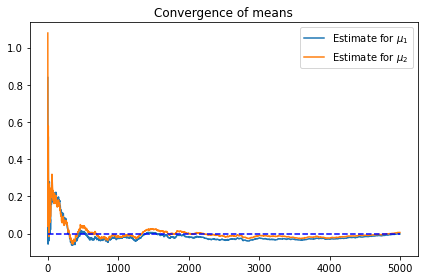

In [28]:
#### **** YOUR CODE HERE **** ####
S_mean = np.cumsum(S,axis=0)/(np.array(range(len(S)))+1).reshape(-1,1)
plt.plot(S_mean[:,0],label='Estimate for $\mu_1$')
plt.plot(S_mean[:,1],label='Estimate for $\mu_2$')

plt.plot([0,5000],[0,0],'b--')
plt.legend(loc='upper right')
plt.title('Convergence of means')
plt.tight_layout()
#### **** You can add extra figures to support the individual report **** ####

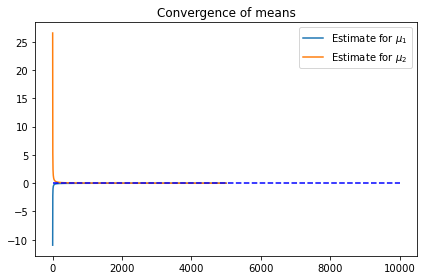

In [29]:
#### **** YOUR CODE HERE **** ####

#### **** You can add extra figures to support the individual report **** ####
S_mu1 = S[:,0].sum() /(np.array(range(len(S)))+1).reshape(-1)
S_mu2 = S[:,1].sum() /(np.array(range(len(S)))+1).reshape(-1)
plt.plot(S_mu1,label='Estimate for $\mu_1$')
plt.plot(S_mu2,label='Estimate for $\mu_2$')

plt.plot([0,10000],[0,0],'b--')
plt.legend(loc='upper right')
plt.title('Convergence of means')
plt.tight_layout()

# Task 5: Apply HMC to the Linear Regression Model (Section 4.4 in the specification doc)

###  **(8 marks)**

Complete the functions and the HMC code for this task:

- `energy_func_lr(hps, x, y)`: where `hps` is a 2+9 dimension array, where the 1st dimension represents $\alpha$, and the 2nd represnets $\beta$. Thus, `hps[0]` should be the current $\alpha$, `hps[1]` the $\beta$ and `hps[2:]` represent the weights `w` for constant and 8 variables respectively. `x` and `y` is the x and y array of training data.

- `energy_grad_lr(hps, x, y)`: the gradient function returns an array containing the partial derivatives of the energy function. should be the same shape for hps. 

- `R`: the number of samples desired
- `L`: number of simulation steps; for this simple case, 20 is easily enough
- `eps`: simulation step length; set by trial-and-error to give approx. 90% acceptance
- `burn`: simply set to `R/10`
- `checkgrad`: set to true to test the consistency of `energy_func` and `energy_grad`




In [43]:
def energy_func_lr(hps, x, y):
    #### **** YOUR CODE HERE **** ####
    alpha = hps[0]
    beta = hps[1]
    w = hps[2:]
    
    N, M = x.shape
    
    a = -(N / 2 * np.log(beta)) + N / 2 * np.log(2*np.pi) - (1 / (2 * beta) * np.sum((y - x @ w) @ (y - x @ w)))
    b = (M / 2 * np.log(alpha)) - M / 2 * np.log(2*np.pi) - ((alpha / 2) * np.sum(w.T @ w))
    
    neglgp = - (a + b)
    
    return neglgp

In [44]:
def energy_grad_lr(hps, x, y):
    
    #### **** YOUR CODE HERE **** ####
    alpha = hps[0]
    beta = hps[1]
    w = hps[2:]
    
    N, M = x.shape
    
    grad_alpha = - M / (2 * alpha) + np.sum(w.T @ w) / 2
    grad_beta = N / (2 * beta) - 1 / (2 * beta ** 2) * np.sum((y - x @ w) @ (y - x @ w))
    grad_w = alpha * w + 1 / (2 * beta) * 2 * (y - x @ w) @ - x

    g = np.array([grad_alpha, grad_beta] + list(grad_w))
    
    return g

In [45]:
np.random.seed(seed=1) 

#### **** YOUR CODE HERE **** ####


R = 10000
burn = int(R/10) 
L = 25
eps = 0.0031
initial_alpha = 1
initial_beta = 1

hps = abs(np.array([initial_alpha, initial_beta] + list(mu_n)))

#### you can adjust the hpyer-parameters. 


S, *_ = hmc.sample(hps, energy_func_lr, energy_grad_lr, R, L, eps, burn=burn, checkgrad=True, args=[X_train, Y_train])

Calc.         Numeric       Delta         Acc.
     331.133       331.133  -9.149477e-08  10
     -5649.5       -5649.5  -6.382797e-07  10
     22.8905       22.8905  -4.287592e-07   8
      -276.4        -276.4   1.793159e-07  10
     403.556       403.556   6.298347e-07   9
    -1457.87      -1457.87   2.420097e-08  11
     1084.11       1084.11   1.404075e-06   9
     -1157.8       -1157.8   2.596266e-08  11
     73.8009       73.8009  -5.459586e-07   9
     70.2738       70.2738  -3.077552e-07   9
     66.2307       66.2307   1.616057e-07   9
|----------|  0% accepted [ 10 secs to go ]
|#---------| 94% accepted [ 9 secs to go ]
|##--------| 94% accepted [ 8 secs to go ]
|###-------| 93% accepted [ 7 secs to go ]
|####------| 92% accepted [ 6 secs to go ]
|#####-----| 92% accepted [ 5 secs to go ]
|######----| 91% accepted [ 4 secs to go ]
|#######---| 91% accepted [ 3 secs to go ]
|########--| 91% accepted [ 2 secs to go ]
|#########-| 90% accepted [ 1 secs to go ]
|##########| 90%

## Print out the RMSE and plot figures for your report

Expected Alpha: 0.015845434773802434
Expected Beta: 9.323986415981715
Expected Bias = 0.20539700360908172


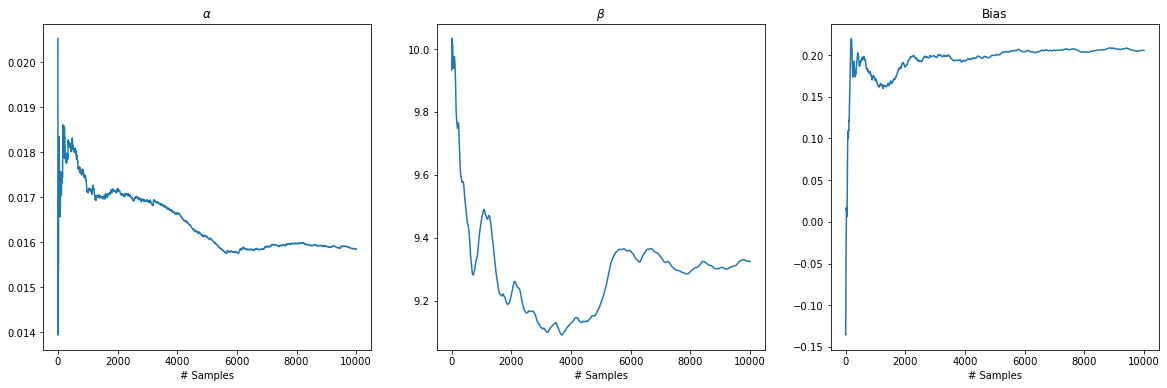

In [47]:
#### **** YOUR CODE HERE **** ####
S_mean = np.cumsum(S, axis=0) / (np.array(range(len(S))) + 1).reshape(-1,1)
fix, ax = plt.subplots(ncols=3, figsize=(20,6))
ax[0].plot(S_mean[:,0])
ax[0].set_xlabel('# Samples')
ax[0].set_title(r'$\alpha$')

ax[1].plot(S_mean[:,1])
ax[1].set_xlabel('# Samples')
ax[1].set_title(r'$\beta$')

ax[2].plot(S_mean[:,-1])
ax[2].set_xlabel('# Samples')
ax[2].set_title('Bias')

alpha = S_mean[-1,0]
print(f"Expected Alpha: {alpha}")
print(f"Expected Beta: {S_mean[-1,1]}")
print(f'Expected Bias = {S_mean[-1,-1]}')

RMSE Train (hmc): 3.012347039325148
RMSE Test (hmc): 2.844885094333188


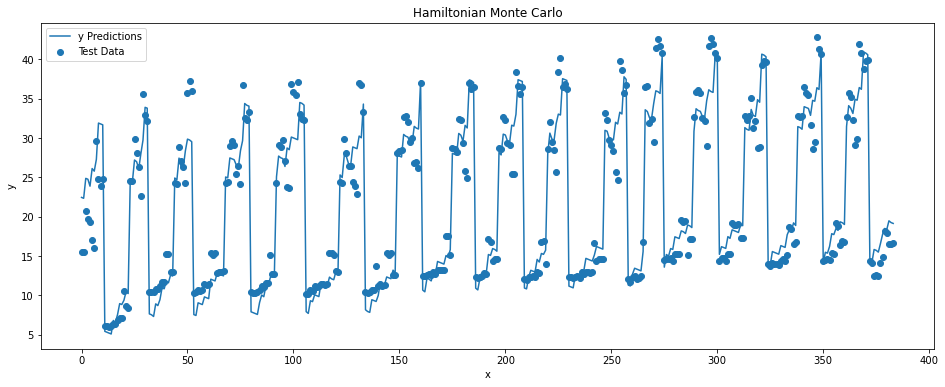

In [48]:
S_mean = np.cumsum(S, axis=0) / (np.array(range(len(S))) + 1).reshape(-1,1)
best_w = S_mean[-1,2:]

rmse_train = error_rms(y_train, (X_train @ best_w))
rmse_test = error_rms(y_test, (X_test @ best_w))


print(f"RMSE Train (hmc): {rmse_train}")
print(f"RMSE Test (hmc): {rmse_test}")


y_pred = X_test @ best_w

plot_pred(y_test, y_pred, 'Hamiltonian Monte Carlo')

# Task 6: Gaussian Processes

###  **(3 marks)**

There's no restriction on the GP implementation, you could either use the sklearn package or the Tensorflow style, the latter of which may receive extra bonus mark depending on the quality of implementation.  

You only need to estimate the weights from $x0$ to $x8$ in this task, then calculate RMSE and plot supporting figures for your report. 

<font color=Red>  It is highly recommended that you impelment this part in a seperated file if your implementation contains too many extra libraries, as it may fool the auto-marker and incorrectly mark the rest of your notebook. 
<font>   
    
    


In [49]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

### Using Default Kernel

R Score: 0.9648203407156363
RMSE Test (gp): 1.8900458253349346
MAE Test (gp): 1.1677819263423632
Log Marginal Liklihood: -17347.88


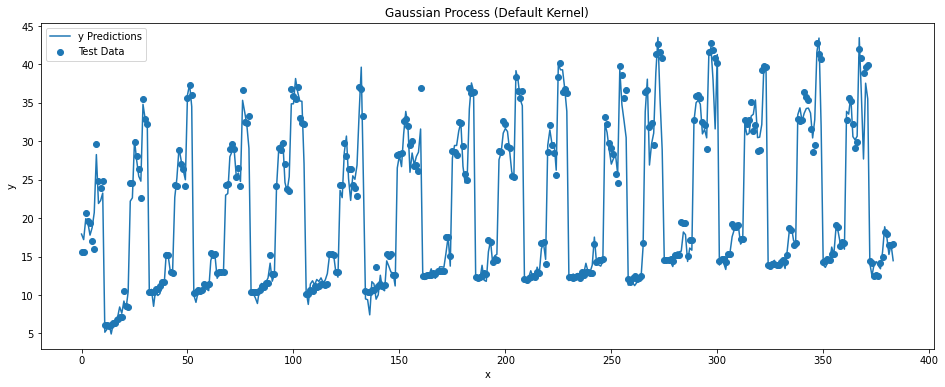

In [50]:
gpr = GaussianProcessRegressor()

gpr.fit(X_train, y_train)
acc = gpr.score(X_test, y_test)
log_prob = gpr.log_marginal_likelihood()
y_pred, std_pred = gpr.predict(X_test, return_std=True)
rmse_test = error_rms(y_test, y_pred)

mae_test = mean_absolute_error(y_test, y_pred)

print(f"R Score: {acc}")
print(f"RMSE Test (gp): {rmse_test}")
print(f"MAE Test (gp): {mae_test}")
print(f"Log Marginal Liklihood: {log_prob:.2f}")

plot_pred(y_test, y_pred, 'Gaussian Process (Default Kernel)')

### Using RBF Kernel

R Score: -0.17524613467654393
RMSE Test (gp): 10.924232516393257
MAE Test (gp): 8.312543062134372
Log Marginal Liklihood: -60162.48


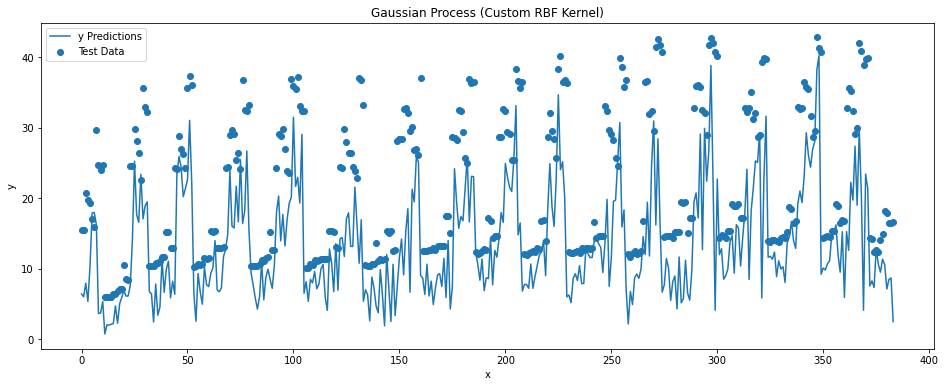

In [51]:
kernel = 1.0 * RBF(length_scale=0.5, length_scale_bounds=(1e-3, 1e2))

gpr = GaussianProcessRegressor(kernel=kernel)
gpr.fit(X_train, y_train)
acc = gpr.score(X_test, y_test)
log_prob = gpr.log_marginal_likelihood()
y_pred, std_pred = gpr.predict(X_test, return_std=True)
rmse_test = error_rms(y_test, y_pred)

mae_test = mean_absolute_error(y_test, y_pred)

print(f"R Score: {acc}")
print(f"RMSE Test (gp): {rmse_test}")
print(f"MAE Test (gp): {mae_test}")
print(f"Log Marginal Liklihood: {log_prob:.2f}")

plot_pred(y_test, y_pred, 'Gaussian Process (Custom RBF Kernel)')


### Using RBF + Noise Kernel

R Score: 0.9955547194590422
RMSE Test (gp): 0.6718558557884639
MAE Test (gp): 0.502244661688745
Log Marginal Liklihood: -729.10


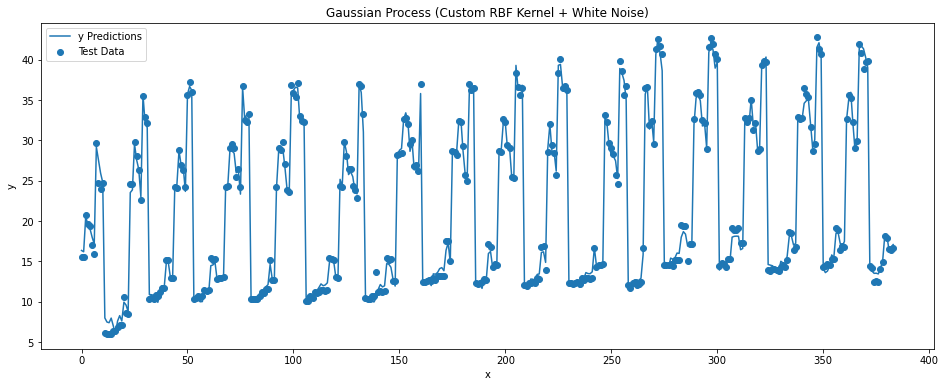

In [52]:
kernel = 1.0 * RBF(length_scale=0.5, length_scale_bounds=(1e-3, 1e2)) + WhiteKernel(
    noise_level=1e-4, noise_level_bounds=(1e-22, 1e2)
)

gpr = GaussianProcessRegressor(kernel=kernel)
gpr.fit(X_train, y_train)
acc = gpr.score(X_test, y_test)
log_prob = gpr.log_marginal_likelihood()
y_pred, std_pred = gpr.predict(X_test, return_std=True)
rmse_test = error_rms(y_test, y_pred)

mae_test = mean_absolute_error(y_test, y_pred)

print(f"R Score: {acc}")
print(f"RMSE Test (gp): {rmse_test}")
print(f"MAE Test (gp): {mae_test}")
print(f"Log Marginal Liklihood: {log_prob:.2f}")

plot_pred(y_test, y_pred, 'Gaussian Process (Custom RBF Kernel + White Noise)')
